In [1]:
#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn import metrics
import os
import datetime as dt
from pathlib import Path

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#this helps you load the csv file from your local machine
from google.colab import files
uploaded = files.upload()

#prompt to load the data will appear and you can upload the data

Saving month.csv to month.csv
Saving new_data.csv to new_data.csv
Saving year.csv to year.csv


In [101]:
#Linear Regression
from sklearn.linear_model import LinearRegression

#Support Vector Regressor
from sklearn.svm import SVR

#Decision Tree
from sklearn.tree import DecisionTreeRegressor

#Random forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [3]:
#data imports
df = pd.read_csv('new_data.csv')
df.head(10)

,Unnamed: 0,shelter_id,Species,found_lng,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,...,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date
0,0,Rochester,Dog,-77.633991,43.177237,-77.634618,43.178387,0.085445,158 Glenwood ave Rochester 14613,54 Tacoma Street Rochester NY 14613,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1
1,1,Rochester,Dog,-77.599173,43.185495,-77.583367,43.171650,1.245466,1094 HUDSON AVE 14621 Rochester 14621,31 CROMBIE ST Rochester NY 14605,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1
2,2,Rochester,Dog,-77.617074,43.241926,-77.615373,43.249483,0.528722,17 Hughes pl Rochester 14608,4313 LAKE AVE Rochester NY 14612,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1
3,3,Rochester,Dog,-77.643231,43.180933,-77.645970,43.179665,0.163735,DRIVING PK and 2 CANARY ST. Rochester 14608,1 CANARY ST Rochester NY 14613,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2
4,4,Rochester,Dog,-77.650684,43.143780,-77.653187,43.145435,0.170467,74 Thurston Rd Rochester 14608,216 DEPEW Street Rochester NY 14611,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2
5,5,Rochester,Dog,-77.574770,43.171302,-77.570683,43.165947,0.423438,696 BAY STREET Rochester 14609,300 PARSELLS AVE Rochester NY 14609,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2
6,6,Rochester,Dog,-77.647460,43.193695,-77.650995,43.192292,0.203109,651 Ridgeway ave Rochester 14615,506 Westmount st Rochester NY 14615,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2
7,7,Rochester,Dog,-77.640468,43.146743,-77.626248,43.141083,0.818158,94 Wellington ave Rochester 14619,289 REYNOLDS ST Rochester NY 14608,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2
8,8,Rochester,Cat,-77.626294,43.145553,-77.626338,43.145297,0.017830,181 REYNOLDS ST 14608 Rochester 14604,187 Reynolds Street Rochester NY 14608,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,3
9,9,Rochester,Dog,-77.635519,43.167980,-77.641678,43.134023,2.364669,195 Dewey ave Rochester 14608,65 Bradburn st Rochester NY 14619,...,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 14808 non-null  int64  
 1   shelter_id                                 14808 non-null  object 
 2   Species                                    14808 non-null  object 
 3   found_lng                                  14808 non-null  float64
 4   found_lat                                  14808 non-null  float64
 5   outcome_lng                                14808 non-null  float64
 6   outcome_lat                                14808 non-null  float64
 7   distance_miles                             14808 non-null  float64
 8   found_address                              14808 non-null  object 
 9   outcome_address                            14808 non-null  object 
 10  geometry              

In [17]:
species_count=df.groupby(['Species', 'shelter_id', 'year_date']).count().rename(columns={'Species':'Species_count'})
species_count

Unnamed: 0  found_lng  found_lat  \
Species     shelter_id year_date                                     
Cat         Atlanta    2019               22         22         22   
                       2020               24         24         24   
                       2021               30         30         30   
            Fresno     2021                5          5          5   
            Mcallen    2017               90         90         90   
            Oakland    2021               36         36         36   
            Pasco      2019                4          4          4   
                       2020                5          5          5   
                       2021                2          2          2   
            Rochester  2021               16         16         16   
Dog         Atlanta    2019              437        437        437   
                       2020              343        343        343   
                       2021              439        439        439   
            Dallas     2018              729        729        729   
                       2019             3440       3440       3440   
                       2020             1358       1358       1358   
            Fresno     2021              145        145        145   
            Las Vegas  2019             2581       2581       2581   
            Madera     2020               99         99         99   
                       2021              106        106        106   
            Mcallen    2017              425        425        425   
            Oakland    2021              217        217        217   
            Pasco      2019              200        200        200   
                       2020              165        165        165   
                       2021               62         62         62   
            Rochester  2021              243        243        243   
            Tucson     2017                9          9          9   
                       2019             1379       1379       1379   
                       2020             1096       1096       1096   
                       2021             1087       1087       1087   
Horse       Fresno     2021                1          1          1   
Other       Atlanta    2019                4          4          4   
                       2020                3          3          3   
                       2021                3          3          3   
Pet reptile Rochester  2021                1          1          1   
Pig         Mcallen    2017                1          1          1   
Rabbit      Mcallen    2017                1          1          1   

                                  outcome_lng  outcome_lat  distance_miles  \
Species     shelter_id year_date                                             
Cat         Atlanta    2019                22           22              22   
                       2020                24           24              24   
                       2021                30           30              30   
            Fresno     2021                 5            5               5   
            Mcallen    2017                90           90              90   
            Oakland    2021                36           36              36   
            Pasco      2019                 4            4               4   
                       2020                 5            5               5   
                       2021                 2            2               2   
            Rochester  2021                16           16              16   
Dog         Atlanta    2019               437          437             437   
                       2020               343          343             343   
                       2021               439          439             439   
            Dallas     2018               729          729             729   
                       2019              3440         3

In [29]:
species_shelter_count=df.groupby(['shelter_id', 'year_date']).count().rename(columns={'Species':'species_shelter_count'})
species_shelter_count

Unnamed: 0  species_shelter_count  found_lng  found_lat  \
shelter_id year_date                                                            
Atlanta    2019              463                    463        463        463   
           2020              370                    370        370        370   
           2021              472                    472        472        472   
Dallas     2018              729                    729        729        729   
           2019             3440                   3440       3440       3440   
           2020             1358                   1358       1358       1358   
Fresno     2021              151                    151        151        151   
Las Vegas  2019             2581                   2581       2581       2581   
Madera     2020               99                     99         99         99   
           2021              106                    106        106        106   
Mcallen    2017              517                    517        517        517   
Oakland    2021              253                    253        253        253   
Pasco      2019              204                    204        204        204   
           2020              170                    170        170        170   
           2021               64                     64         64         64   
Rochester  2021              260                    260        260        260   
Tucson     2017                9                      9          9          9   
           2019             1379                   1379       1379       1379   
           2020             1096                   1096       1096       1096   
           2021             1087                   1087       1087       1087   

                      outcome_lng  outcome_lat  distance_miles  found_address  \
shelter_id year_date                                                            
Atlanta    2019               463          463             463            463   
           2020               370          370             370            370   
           2021               472          472             472            472   
Dallas     2018               729          729             729            729   
           2019              3440         3440            3440           3440   
           2020              1358         1358            1358           1358   
Fresno     2021               151          151             151            151   
Las Vegas  2019              2581         2581            2581           2581   
Madera     2020                99           99              99             99   
           2021               106          106             106            106   
Mcallen    2017               517          517             517            517   
Oakland    2021               253          253             253            253   
Pasco      2019               204          204             204            204   
           2020               170          170             170            170   
           2021                64           64              64             64   
Rochester  2021               260          260             260            260   
Tucson     2017                 9            9               9              9   
           2019              1379         1379            1379           1379   
           2020              1096         1096            1096           1096   
           2021              1087         1087            1087           1087   

                      outcome_address  geometry  annual_intake_2019  \
shelter_id year_date                                                  
Atlanta    2019                   463       463                 463   
           2020                   370       370                 370   
           2021                   472       472                 472   
Dallas     2018                   729       729                 729   
           2019               

In [31]:
new_df=pd.merge(df, species_shelter_count['species_shelter_count'], on=['shelter_id', 'year_date'], how='left')
new_df.head(10)

,Unnamed: 0,shelter_id,Species,found_lng,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,...,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count
0,0,Rochester,Dog,-77.633991,43.177237,-77.634618,43.178387,0.085445,158 Glenwood ave Rochester 14613,54 Tacoma Street Rochester NY 14613,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1,260
1,1,Rochester,Dog,-77.599173,43.185495,-77.583367,43.171650,1.245466,1094 HUDSON AVE 14621 Rochester 14621,31 CROMBIE ST Rochester NY 14605,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1,260
2,2,Rochester,Dog,-77.617074,43.241926,-77.615373,43.249483,0.528722,17 Hughes pl Rochester 14608,4313 LAKE AVE Rochester NY 14612,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1,260
3,3,Rochester,Dog,-77.643231,43.180933,-77.645970,43.179665,0.163735,DRIVING PK and 2 CANARY ST. Rochester 14608,1 CANARY ST Rochester NY 14613,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260
4,4,Rochester,Dog,-77.650684,43.143780,-77.653187,43.145435,0.170467,74 Thurston Rd Rochester 14608,216 DEPEW Street Rochester NY 14611,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260
5,5,Rochester,Dog,-77.574770,43.171302,-77.570683,43.165947,0.423438,696 BAY STREET Rochester 14609,300 PARSELLS AVE Rochester NY 14609,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260
6,6,Rochester,Dog,-77.647460,43.193695,-77.650995,43.192292,0.203109,651 Ridgeway ave Rochester 14615,506 Westmount st Rochester NY 14615,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260
7,7,Rochester,Dog,-77.640468,43.146743,-77.626248,43.141083,0.818158,94 Wellington ave Rochester 14619,289 REYNOLDS ST Rochester NY 14608,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260
8,8,Rochester,Cat,-77.626294,43.145553,-77.626338,43.145297,0.017830,181 REYNOLDS ST 14608 Rochester 14604,187 Reynolds Street Rochester NY 14608,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,3,260
9,9,Rochester,Dog,-77.635519,43.167980,-77.641678,43.134023,2.364669,195 Dewey ave Rochester 14608,65 Bradburn st Rochester NY 14619,...,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373,2021,3,260


In [33]:
new_df=pd.merge(new_df, species_count['found_lng'], on=['Species', 'shelter_id', 'year_date'], how='left')
new_df

,Unnamed: 0,shelter_id,Species,found_lng_x,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,...,annual_intake_2021,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count,found_lng_y
0,0,Rochester,Dog,-77.633991,43.177237,-77.634618,43.178387,0.085445,158 Glenwood ave Rochester 14613,54 Tacoma Street Rochester NY 14613,...,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1,260,243
1,1,Rochester,Dog,-77.599173,43.185495,-77.583367,43.171650,1.245466,1094 HUDSON AVE 14621 Rochester 14621,31 CROMBIE ST Rochester NY 14605,...,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1,260,243
2,2,Rochester,Dog,-77.617074,43.241926,-77.615373,43.249483,0.528722,17 Hughes pl Rochester 14608,4313 LAKE AVE Rochester NY 14612,...,2677.0,3541,NY,Monroe County,741770,209.480373,2021,1,260,243
3,3,Rochester,Dog,-77.643231,43.180933,-77.645970,43.179665,0.163735,DRIVING PK and 2 CANARY ST. Rochester 14608,1 CANARY ST Rochester NY 14613,...,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260,243
4,4,Rochester,Dog,-77.650684,43.143780,-77.653187,43.145435,0.170467,74 Thurston Rd Rochester 14608,216 DEPEW Street Rochester NY 14611,...,2677.0,3541,NY,Monroe County,741770,209.480373,2021,2,260,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14803,17686,Atlanta,Dog,-84.222548,33.873611,-84.224401,33.882604,0.628904,"4054 Briarglade Way Atlanta, 30340 GA",3187 Woodlyne Way Atlanta GA 30340,...,8302.0,702,GA,Dekalb County,764382,1088.863248,2019,9,463,437
14804,17687,Atlanta,Dog,-84.133640,33.708010,-84.132764,33.709698,0.126830,721 Hillandale Lane GA 30058,577 Hillandale Park Drive Lithonia GA 30058,...,8302.0,702,GA,Dekalb County,764382,1088.863248,2019,1,463,437
14805,17688,Atlanta,Dog,-84.288835,33.726502,-84.276410,33.706781,1.536071,"2476 Brentwood Road DECATUR, 30032, GA",2176 Loving Drive Decatur GA 30037,...,8302.0,702,GA,Dekalb County,764382,1088.863248,2019,1,463,437
14806,17689,Atlanta,Dog,-84.191581,33.718448,-84.192158,33.718910,0.046022,4822 Truitt Ln GA 30035,4807 Wilkins Station Dr GA 30035,...,8302.0,702,GA,Dekalb County,764382,1088.863248,2019,11,463,437


In [34]:
new_df=new_df.rename(columns={'found_lng_y':'Species_Count'})


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14808 entries, 0 to 14807
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 14808 non-null  int64  
 1   shelter_id                                 14808 non-null  object 
 2   Species                                    14808 non-null  object 
 3   found_lng_x                                14808 non-null  float64
 4   found_lat                                  14808 non-null  float64
 5   outcome_lng                                14808 non-null  float64
 6   outcome_lat                                14808 non-null  float64
 7   distance_miles                             14808 non-null  float64
 8   found_address                              14808 non-null  object 
 9   outcome_address                            14808 non-null  object 
 10  geometry              

In [38]:
new_df['species_perc']=(new_df['Species_Count']/new_df['species_shelter_count'])*100
new_df.head(10)

,Unnamed: 0,shelter_id,Species,found_lng_x,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,...,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count,Species_Count,species_perc
0,0,Rochester,Dog,-77.633991,43.177237,-77.634618,43.178387,0.085445,158 Glenwood ave Rochester 14613,54 Tacoma Street Rochester NY 14613,...,3541,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538
1,1,Rochester,Dog,-77.599173,43.185495,-77.583367,43.171650,1.245466,1094 HUDSON AVE 14621 Rochester 14621,31 CROMBIE ST Rochester NY 14605,...,3541,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538
2,2,Rochester,Dog,-77.617074,43.241926,-77.615373,43.249483,0.528722,17 Hughes pl Rochester 14608,4313 LAKE AVE Rochester NY 14612,...,3541,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538
3,3,Rochester,Dog,-77.643231,43.180933,-77.645970,43.179665,0.163735,DRIVING PK and 2 CANARY ST. Rochester 14608,1 CANARY ST Rochester NY 14613,...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
4,4,Rochester,Dog,-77.650684,43.143780,-77.653187,43.145435,0.170467,74 Thurston Rd Rochester 14608,216 DEPEW Street Rochester NY 14611,...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
5,5,Rochester,Dog,-77.574770,43.171302,-77.570683,43.165947,0.423438,696 BAY STREET Rochester 14609,300 PARSELLS AVE Rochester NY 14609,...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
6,6,Rochester,Dog,-77.647460,43.193695,-77.650995,43.192292,0.203109,651 Ridgeway ave Rochester 14615,506 Westmount st Rochester NY 14615,...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
7,7,Rochester,Dog,-77.640468,43.146743,-77.626248,43.141083,0.818158,94 Wellington ave Rochester 14619,289 REYNOLDS ST Rochester NY 14608,...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
8,8,Rochester,Cat,-77.626294,43.145553,-77.626338,43.145297,0.017830,181 REYNOLDS ST 14608 Rochester 14604,187 Reynolds Street Rochester NY 14608,...,3541,NY,Monroe County,741770,209.480373,2021,3,260,16,6.153846
9,9,Rochester,Dog,-77.635519,43.167980,-77.641678,43.134023,2.364669,195 Dewey ave Rochester 14608,65 Bradburn st Rochester NY 14619,...,3541,NY,Monroe County,741770,209.480373,2021,3,260,243,93.461538


In [39]:
new_df=new_df.drop(columns=['Unnamed: 0'])

In [40]:
new_df.head(10)

,shelter_id,Species,found_lng_x,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,geometry,...,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count,Species_Count,species_perc
0,Rochester,Dog,-77.633991,43.177237,-77.634618,43.178387,0.085445,158 Glenwood ave Rochester 14613,54 Tacoma Street Rochester NY 14613,POINT (-77.6346175 43.1783868),...,3541,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538
1,Rochester,Dog,-77.599173,43.185495,-77.583367,43.171650,1.245466,1094 HUDSON AVE 14621 Rochester 14621,31 CROMBIE ST Rochester NY 14605,POINT (-77.5833667 43.1716499),...,3541,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538
2,Rochester,Dog,-77.617074,43.241926,-77.615373,43.249483,0.528722,17 Hughes pl Rochester 14608,4313 LAKE AVE Rochester NY 14612,POINT (-77.6153732 43.2494835),...,3541,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538
3,Rochester,Dog,-77.643231,43.180933,-77.645970,43.179665,0.163735,DRIVING PK and 2 CANARY ST. Rochester 14608,1 CANARY ST Rochester NY 14613,POINT (-77.64597 43.1796653),...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
4,Rochester,Dog,-77.650684,43.143780,-77.653187,43.145435,0.170467,74 Thurston Rd Rochester 14608,216 DEPEW Street Rochester NY 14611,POINT (-77.6531874 43.145435),...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
5,Rochester,Dog,-77.574770,43.171302,-77.570683,43.165947,0.423438,696 BAY STREET Rochester 14609,300 PARSELLS AVE Rochester NY 14609,POINT (-77.5706831 43.1659468),...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
6,Rochester,Dog,-77.647460,43.193695,-77.650995,43.192292,0.203109,651 Ridgeway ave Rochester 14615,506 Westmount st Rochester NY 14615,POINT (-77.650995 43.1922921),...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
7,Rochester,Dog,-77.640468,43.146743,-77.626248,43.141083,0.818158,94 Wellington ave Rochester 14619,289 REYNOLDS ST Rochester NY 14608,POINT (-77.6262476 43.1410834),...,3541,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538
8,Rochester,Cat,-77.626294,43.145553,-77.626338,43.145297,0.017830,181 REYNOLDS ST 14608 Rochester 14604,187 Reynolds Street Rochester NY 14608,POINT (-77.6263384 43.1452973),...,3541,NY,Monroe County,741770,209.480373,2021,3,260,16,6.153846
9,Rochester,Dog,-77.635519,43.167980,-77.641678,43.134023,2.364669,195 Dewey ave Rochester 14608,65 Bradburn st Rochester NY 14619,POINT (-77.6416784 43.1340235),...,3541,NY,Monroe County,741770,209.480373,2021,3,260,243,93.461538


In [44]:
new_df['species_perc_group'] = pd.cut(x=new_df['species_perc'], 
                                      bins=[0, 10,20,30,40,50,60,70,80,90,100], 
                                      labels=['0s','10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])
new_df.head(10)

,shelter_id,Species,found_lng_x,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,geometry,...,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count,Species_Count,species_perc,species_perc_group
0,Rochester,Dog,-77.633991,43.177237,-77.634618,43.178387,0.085445,158 Glenwood ave Rochester 14613,54 Tacoma Street Rochester NY 14613,POINT (-77.6346175 43.1783868),...,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538,90s
1,Rochester,Dog,-77.599173,43.185495,-77.583367,43.171650,1.245466,1094 HUDSON AVE 14621 Rochester 14621,31 CROMBIE ST Rochester NY 14605,POINT (-77.5833667 43.1716499),...,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538,90s
2,Rochester,Dog,-77.617074,43.241926,-77.615373,43.249483,0.528722,17 Hughes pl Rochester 14608,4313 LAKE AVE Rochester NY 14612,POINT (-77.6153732 43.2494835),...,NY,Monroe County,741770,209.480373,2021,1,260,243,93.461538,90s
3,Rochester,Dog,-77.643231,43.180933,-77.645970,43.179665,0.163735,DRIVING PK and 2 CANARY ST. Rochester 14608,1 CANARY ST Rochester NY 14613,POINT (-77.64597 43.1796653),...,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538,90s
4,Rochester,Dog,-77.650684,43.143780,-77.653187,43.145435,0.170467,74 Thurston Rd Rochester 14608,216 DEPEW Street Rochester NY 14611,POINT (-77.6531874 43.145435),...,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538,90s
5,Rochester,Dog,-77.574770,43.171302,-77.570683,43.165947,0.423438,696 BAY STREET Rochester 14609,300 PARSELLS AVE Rochester NY 14609,POINT (-77.5706831 43.1659468),...,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538,90s
6,Rochester,Dog,-77.647460,43.193695,-77.650995,43.192292,0.203109,651 Ridgeway ave Rochester 14615,506 Westmount st Rochester NY 14615,POINT (-77.650995 43.1922921),...,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538,90s
7,Rochester,Dog,-77.640468,43.146743,-77.626248,43.141083,0.818158,94 Wellington ave Rochester 14619,289 REYNOLDS ST Rochester NY 14608,POINT (-77.6262476 43.1410834),...,NY,Monroe County,741770,209.480373,2021,2,260,243,93.461538,90s
8,Rochester,Cat,-77.626294,43.145553,-77.626338,43.145297,0.017830,181 REYNOLDS ST 14608 Rochester 14604,187 Reynolds Street Rochester NY 14608,POINT (-77.6263384 43.1452973),...,NY,Monroe County,741770,209.480373,2021,3,260,16,6.153846,0s
9,Rochester,Dog,-77.635519,43.167980,-77.641678,43.134023,2.364669,195 Dewey ave Rochester 14608,65 Bradburn st Rochester NY 14619,POINT (-77.6416784 43.1340235),...,NY,Monroe County,741770,209.480373,2021,3,260,243,93.461538,90s


In [4]:
#data imports
df_month = pd.read_csv('month.csv')
df_month.head(10)

,shelter_id,Species,year_date,month_date,count
0,Atlanta,Cat,2019,1,1
1,Atlanta,Cat,2019,2,1
2,Atlanta,Cat,2019,3,2
3,Atlanta,Cat,2019,4,1
4,Atlanta,Cat,2019,5,4
5,Atlanta,Cat,2019,6,3
6,Atlanta,Cat,2019,7,1
7,Atlanta,Cat,2019,8,1
8,Atlanta,Cat,2019,9,2
9,Atlanta,Cat,2019,10,3


In [5]:
#data imports
df_year = pd.read_csv('year.csv')
df_year.head(10)

,shelter_id,Species,year_date,count
0,Atlanta,Cat,2019,22
1,Atlanta,Cat,2020,24
2,Atlanta,Cat,2021,30
3,Atlanta,Dog,2019,437
4,Atlanta,Dog,2020,343
5,Atlanta,Dog,2021,439
6,Atlanta,Other,2019,4
7,Atlanta,Other,2020,3
8,Atlanta,Other,2021,3
9,Dallas,Dog,2018,729


In [45]:
new_df.describe()

,found_lng_x,found_lat,outcome_lng,outcome_lat,distance_miles,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count,Species_Count,species_perc
count,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14603.000000,12022.000000,14808.000000,1.480800e+04,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000
mean,-102.569715,33.311113,-102.569910,33.311180,0.774510,28492.713331,16605.917757,17728.520629,10724.080970,1.301541e+06,404.266602,2019.411804,6.031942,1772.465829,1760.415046,97.026597
std,11.138402,2.595763,11.138425,2.595805,1.114278,11403.360869,4438.693903,5903.233094,10149.335049,5.035916e+05,347.851013,0.936522,3.659679,1160.488532,1175.311338,11.903422
min,-122.299066,26.093948,-122.300269,26.094065,0.000000,3867.000000,2732.000000,2677.000000,702.000000,1.562550e+05,28.022776,2017.000000,1.000000,9.000000,1.000000,0.193424
25%,-111.036201,32.264824,-111.036971,32.264406,0.080639,27064.000000,17547.000000,18533.000000,1992.000000,1.043433e+06,43.843565,2019.000000,3.000000,729.000000,729.000000,100.000000
50%,-96.915638,32.736085,-96.918725,32.736138,0.275062,27922.000000,17957.000000,18533.000000,2250.000000,1.304379e+06,246.198667,2019.000000,6.000000,1358.000000,1358.000000,100.000000
75%,-96.722042,33.833684,-96.721970,33.833126,0.891665,40155.000000,19594.000000,23940.000000,20878.000000,1.304379e+06,654.808735,2020.000000,9.000000,2581.000000,2581.000000,100.000000
max,-77.544589,43.241926,-77.540304,43.249483,4.999699,40155.000000,19594.000000,23940.000000,23799.000000,2.265461e+06,1088.863248,2021.000000,12.000000,3440.000000,3440.000000,100.000000


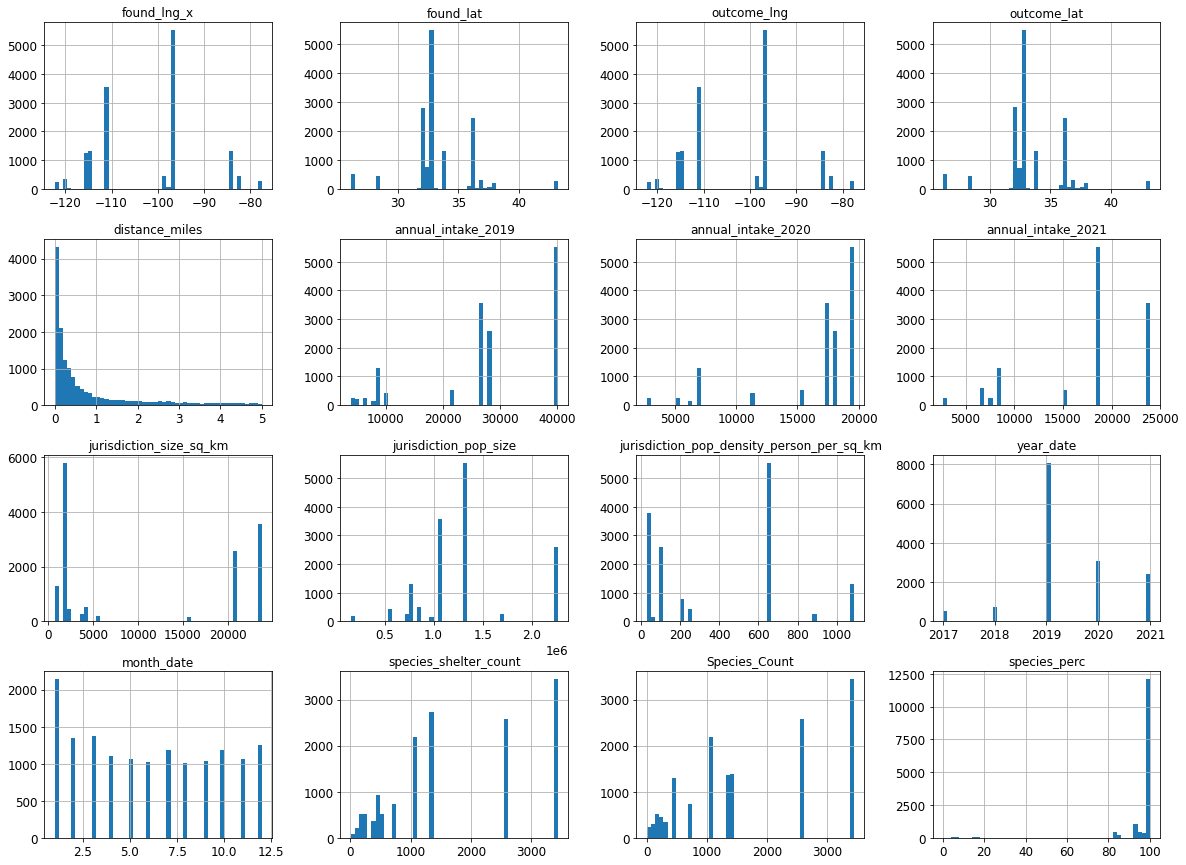

In [46]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [47]:
new_df = new_df.sample(frac=1).reset_index(drop=True) #random shuffling of the dataset to reduce bias in test and train
new_df.head()

,shelter_id,Species,found_lng_x,found_lat,outcome_lng,outcome_lat,distance_miles,found_address,outcome_address,geometry,...,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,year_date,month_date,species_shelter_count,Species_Count,species_perc,species_perc_group
0,Atlanta,Cat,-84.292532,33.762436,-84.293502,33.763593,0.097378,S Candler St GA 30032,226 E Davis Street Decatur GA 30030,POINT (-84.293502 33.7635931),...,GA,Dekalb County,764382,1088.863248,2019,3,463,22,4.75162,0s
1,Tucson,Dog,-111.169462,32.134353,-111.123887,32.133720,2.672400,W AJO HWY and W VALENCIA RD Tuscon AZ,"1120 E GANLEY RD TUCSON, AZ 85706",POINT (-111.1238875 32.13372),...,AZ,Pima County,1043433,43.843565,2021,7,1087,1087,100.00000,90s
2,Dallas,Dog,-96.782716,32.699902,-96.782591,32.700041,0.012023,"2410 MOFFATT AVE, DALLAS TX 75216",2414 MOFFATT AVE DALLAS TX 75216,POINT (-96.7825907 32.7000406),...,TX,Dallas City,1304379,654.808735,2019,1,3440,3440,100.00000,90s
3,Dallas,Dog,-96.872798,32.768991,-96.827797,32.738998,3.337421,"1818 N WESTMORELAND RD, DALLAS TX 75212",330 W BROOKLYN AVE DALLAS TX 75208,POINT (-96.8277965 32.7389979),...,TX,Dallas City,1304379,654.808735,2019,4,3440,3440,100.00000,90s
4,Las Vegas,Dog,-115.064722,36.231944,-115.078647,36.228249,0.818533,3975 NELLIS BLVD LAS VEGAS NV 89115,3895 LAS VEGAS BLVD LAS VEGAS NV 89115,POINT (-115.078647 36.228249),...,NV,Clark County,2265461,108.509484,2019,2,2581,2581,100.00000,90s


In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   shelter_id                                 14808 non-null  object  
 1   Species                                    14808 non-null  object  
 2   found_lng_x                                14808 non-null  float64 
 3   found_lat                                  14808 non-null  float64 
 4   outcome_lng                                14808 non-null  float64 
 5   outcome_lat                                14808 non-null  float64 
 6   distance_miles                             14808 non-null  float64 
 7   found_address                              14808 non-null  object  
 8   outcome_address                            14808 non-null  object  
 9   geometry                                   14808 non-null  object  
 10  annual_int

In [57]:
train_df = new_df.drop(columns=['found_lng_x', 'found_lat', 'found_address', 'geometry', 
                                'outcome_address', 'year_date', 'month_date'])
train_df.head(10)

,shelter_id,Species,outcome_lng,outcome_lat,distance_miles,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,Species_Count,species_perc,species_perc_group
0,Atlanta,Cat,-84.293502,33.763593,0.097378,8288,7062.0,8302.0,702,GA,Dekalb County,764382,1088.863248,463,22,4.75162,0s
1,Tucson,Dog,-111.123887,32.133720,2.672400,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1087,1087,100.00000,90s
2,Dallas,Dog,-96.782591,32.700041,0.012023,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,3440,3440,100.00000,90s
3,Dallas,Dog,-96.827797,32.738998,3.337421,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,3440,3440,100.00000,90s
4,Las Vegas,Dog,-115.078647,36.228249,0.818533,27922,17957.0,NaN,20878,NV,Clark County,2265461,108.509484,2581,2581,100.00000,90s
5,Dallas,Dog,-96.660785,32.750912,0.016561,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,1358,1358,100.00000,90s
6,Dallas,Dog,-96.836759,32.750270,0.072061,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,3440,3440,100.00000,90s
7,Tucson,Dog,-110.915748,32.196689,0.410669,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1087,1087,100.00000,90s
8,Tucson,Dog,-110.846142,32.203165,0.388962,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1379,1379,100.00000,90s
9,Tucson,Dog,-110.912081,32.238541,2.909841,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1379,1379,100.00000,90s


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   outcome_lng                                14808 non-null  float64
 1   outcome_lat                                14808 non-null  float64
 2   annual_intake_2019                         14808 non-null  int64  
 3   annual_intake_2020                         14808 non-null  float64
 4   annual_intake_2021                         14808 non-null  float64
 5   jurisdiction_size_sq_km                    14808 non-null  int64  
 6   jurisdiction_pop_size                      14808 non-null  int64  
 7   jurisdiction_pop_density_person_per_sq_km  14808 non-null  float64
 8   species_shelter_count                      14808 non-null  int64  
 9   species_perc                               14808 non-null  float64
 10  shelter_id_Atlanta    

In [59]:
train_df = train_df.drop(columns=['Species_Count'])
train_df.head(10)

,shelter_id,Species,outcome_lng,outcome_lat,distance_miles,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,species_perc,species_perc_group
0,Atlanta,Cat,-84.293502,33.763593,0.097378,8288,7062.0,8302.0,702,GA,Dekalb County,764382,1088.863248,463,4.75162,0s
1,Tucson,Dog,-111.123887,32.133720,2.672400,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1087,100.00000,90s
2,Dallas,Dog,-96.782591,32.700041,0.012023,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,3440,100.00000,90s
3,Dallas,Dog,-96.827797,32.738998,3.337421,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,3440,100.00000,90s
4,Las Vegas,Dog,-115.078647,36.228249,0.818533,27922,17957.0,NaN,20878,NV,Clark County,2265461,108.509484,2581,100.00000,90s
5,Dallas,Dog,-96.660785,32.750912,0.016561,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,1358,100.00000,90s
6,Dallas,Dog,-96.836759,32.750270,0.072061,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735,3440,100.00000,90s
7,Tucson,Dog,-110.915748,32.196689,0.410669,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1087,100.00000,90s
8,Tucson,Dog,-110.846142,32.203165,0.388962,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1379,100.00000,90s
9,Tucson,Dog,-110.912081,32.238541,2.909841,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565,1379,100.00000,90s


In [84]:
dependent_variable = train_df['distance_miles']
train_df = train_df.drop(columns=['distance_miles'])

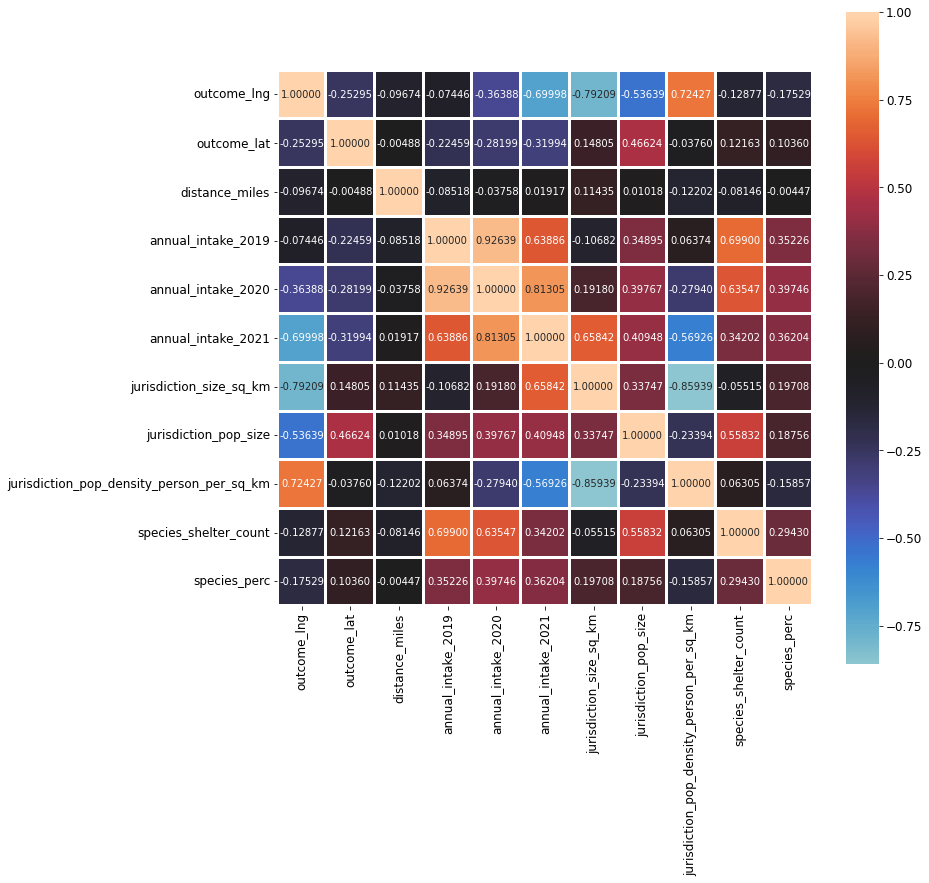

In [60]:
#Ploting the graph for better visualization
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_df.corr(), vmax=1.0, center=0, fmt='.5f', square=True, linewidths=2, annot=True)

In [53]:
train_df['Species'].value_counts().reset_index()

,index,Species
0,Dog,14560
1,Cat,234
2,Other,10
3,Pig,1
4,Rabbit,1
5,Pet reptile,1
6,Horse,1


In [88]:
def get_cat_num_features(df):
    num_features = []
    cat_features = []
    for col in df.columns:
        if df[col].dtype=="float64" or df[col].dtype=="int64":
            num_features.append(col)
        else:
            cat_features.append(col)
    return num_features, cat_features
  
num_feat,cat_feat=get_cat_num_features(train_df)

In [114]:
# Check for number of null values
nulls = x_test.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [72]:
#train_df['annual_intake_2020']=train_df.groupby('shelter_id')["annual_intake_2020"].transform(lambda x: x.fillna(x.median()))
train_df['annual_intake_2020'] = train_df['annual_intake_2020'].fillna(train_df['annual_intake_2020'].median())
train_df['annual_intake_2021'] = train_df['annual_intake_2021'].fillna(train_df['annual_intake_2021'].median())

#train_df['annual_intake_2021']=train_df.groupby('shelter_id')["annual_intake_2021"].transform(lambda x: x.fillna(x.median()))


In [89]:
num_feat

['outcome_lng',
 'outcome_lat',
 'annual_intake_2019',
 'annual_intake_2020',
 'annual_intake_2021',
 'jurisdiction_size_sq_km',
 'jurisdiction_pop_size',
 'jurisdiction_pop_density_person_per_sq_km',
 'species_shelter_count',
 'species_perc']

In [90]:
cat_feat

['shelter_id_Atlanta',
 'shelter_id_Dallas',
 'shelter_id_Fresno',
 'shelter_id_Las Vegas',
 'shelter_id_Madera',
 'shelter_id_Mcallen',
 'shelter_id_Oakland',
 'shelter_id_Pasco',
 'shelter_id_Rochester',
 'shelter_id_Tucson',
 'Species_Cat',
 'Species_Dog',
 'Species_Horse',
 'Species_Other',
 'Species_Pet reptile',
 'Species_Pig',
 'Species_Rabbit',
 'justidiction_state_AZ',
 'justidiction_state_CA',
 'justidiction_state_FL',
 'justidiction_state_GA',
 'justidiction_state_NV',
 'justidiction_state_NY',
 'justidiction_state_TX',
 'jurisdiction_region_Alameda County',
 'jurisdiction_region_Clark County',
 'jurisdiction_region_Dallas City',
 'jurisdiction_region_Dekalb County',
 'jurisdiction_region_Fresno County',
 'jurisdiction_region_Hidalgo County',
 'jurisdiction_region_Madera County',
 'jurisdiction_region_Monroe County',
 'jurisdiction_region_Pasco County',
 'jurisdiction_region_Pima County',
 'species_perc_group_0s',
 'species_perc_group_10s',
 'species_perc_group_20s',
 'speci

In [78]:
train_df=pd.get_dummies(train_df,columns=cat_feat)
train_df.head(10)

,outcome_lng,outcome_lat,distance_miles,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,...,species_perc_group_0s,species_perc_group_10s,species_perc_group_20s,species_perc_group_30s,species_perc_group_40s,species_perc_group_50s,species_perc_group_60s,species_perc_group_70s,species_perc_group_80s,species_perc_group_90s
0,-84.293502,33.763593,0.097378,8288,7062.0,8302.0,702,764382,1088.863248,463,...,1,0,0,0,0,0,0,0,0,0
1,-111.123887,32.133720,2.672400,27064,17547.0,23940.0,23799,1043433,43.843565,1087,...,0,0,0,0,0,0,0,0,0,1
2,-96.782591,32.700041,0.012023,40155,19594.0,18533.0,1992,1304379,654.808735,3440,...,0,0,0,0,0,0,0,0,0,1
3,-96.827797,32.738998,3.337421,40155,19594.0,18533.0,1992,1304379,654.808735,3440,...,0,0,0,0,0,0,0,0,0,1
4,-115.078647,36.228249,0.818533,27922,17957.0,18533.0,20878,2265461,108.509484,2581,...,0,0,0,0,0,0,0,0,0,1
5,-96.660785,32.750912,0.016561,40155,19594.0,18533.0,1992,1304379,654.808735,1358,...,0,0,0,0,0,0,0,0,0,1
6,-96.836759,32.750270,0.072061,40155,19594.0,18533.0,1992,1304379,654.808735,3440,...,0,0,0,0,0,0,0,0,0,1
7,-110.915748,32.196689,0.410669,27064,17547.0,23940.0,23799,1043433,43.843565,1087,...,0,0,0,0,0,0,0,0,0,1
8,-110.846142,32.203165,0.388962,27064,17547.0,23940.0,23799,1043433,43.843565,1379,...,0,0,0,0,0,0,0,0,0,1
9,-110.912081,32.238541,2.909841,27064,17547.0,23940.0,23799,1043433,43.843565,1379,...,0,0,0,0,0,0,0,0,0,1


In [91]:
# Standardize the data based on their z-score
std_df = train_df[num_feat]
std_df.head(10)

,outcome_lng,outcome_lat,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,species_perc
0,-84.293502,33.763593,8288,7062.0,8302.0,702,764382,1088.863248,463,4.75162
1,-111.123887,32.133720,27064,17547.0,23940.0,23799,1043433,43.843565,1087,100.00000
2,-96.782591,32.700041,40155,19594.0,18533.0,1992,1304379,654.808735,3440,100.00000
3,-96.827797,32.738998,40155,19594.0,18533.0,1992,1304379,654.808735,3440,100.00000
4,-115.078647,36.228249,27922,17957.0,18533.0,20878,2265461,108.509484,2581,100.00000
5,-96.660785,32.750912,40155,19594.0,18533.0,1992,1304379,654.808735,1358,100.00000
6,-96.836759,32.750270,40155,19594.0,18533.0,1992,1304379,654.808735,3440,100.00000
7,-110.915748,32.196689,27064,17547.0,23940.0,23799,1043433,43.843565,1087,100.00000
8,-110.846142,32.203165,27064,17547.0,23940.0,23799,1043433,43.843565,1379,100.00000
9,-110.912081,32.238541,27064,17547.0,23940.0,23799,1043433,43.843565,1379,100.00000


In [93]:
#std_df = std_df.drop(columns=['distance_miles'])
std_df.head(10)

,outcome_lng,outcome_lat,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,species_perc
0,-84.293502,33.763593,8288,7062.0,8302.0,702,764382,1088.863248,463,4.75162
1,-111.123887,32.133720,27064,17547.0,23940.0,23799,1043433,43.843565,1087,100.00000
2,-96.782591,32.700041,40155,19594.0,18533.0,1992,1304379,654.808735,3440,100.00000
3,-96.827797,32.738998,40155,19594.0,18533.0,1992,1304379,654.808735,3440,100.00000
4,-115.078647,36.228249,27922,17957.0,18533.0,20878,2265461,108.509484,2581,100.00000
5,-96.660785,32.750912,40155,19594.0,18533.0,1992,1304379,654.808735,1358,100.00000
6,-96.836759,32.750270,40155,19594.0,18533.0,1992,1304379,654.808735,3440,100.00000
7,-110.915748,32.196689,27064,17547.0,23940.0,23799,1043433,43.843565,1087,100.00000
8,-110.846142,32.203165,27064,17547.0,23940.0,23799,1043433,43.843565,1379,100.00000
9,-110.912081,32.238541,27064,17547.0,23940.0,23799,1043433,43.843565,1379,100.00000


In [94]:
# Standardize the data based on their z-score
for stdCol in std_df.columns:
    std_df[stdCol] = (std_df[stdCol] - std_df[stdCol].mean()) / (std_df[stdCol].mean())

std_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,outcome_lng,outcome_lat,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,species_perc
0,-0.178185,0.013581,-0.709119,-0.575208,-0.535679,-0.934540,-0.412710,1.693429,-0.738782,-0.951028
1,0.083397,-0.035347,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.386730,0.030645
2,-0.056423,-0.018346,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
3,-0.055982,-0.017177,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
4,0.121953,0.087570,-0.020030,0.080145,0.036528,0.946833,0.740599,-0.731589,0.456163,0.030645
5,-0.057611,-0.016819,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,-0.233836,0.030645
6,-0.055895,-0.016838,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
7,0.081367,-0.033457,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.386730,0.030645
8,0.080689,-0.033263,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.221988,0.030645
9,0.081332,-0.032201,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.221988,0.030645


In [95]:
std_df.head(10)

,outcome_lng,outcome_lat,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,species_perc
0,-0.178185,0.013581,-0.709119,-0.575208,-0.535679,-0.934540,-0.412710,1.693429,-0.738782,-0.951028
1,0.083397,-0.035347,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.386730,0.030645
2,-0.056423,-0.018346,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
3,-0.055982,-0.017177,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
4,0.121953,0.087570,-0.020030,0.080145,0.036528,0.946833,0.740599,-0.731589,0.456163,0.030645
5,-0.057611,-0.016819,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,-0.233836,0.030645
6,-0.055895,-0.016838,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
7,0.081367,-0.033457,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.386730,0.030645
8,0.080689,-0.033263,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.221988,0.030645
9,0.081332,-0.032201,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.221988,0.030645


In [96]:
#Merge the standardized data with remaining categorical and ordinal data
train_df = train_df.drop(columns = num_feat)
train_df = pd.concat([train_df,std_df],axis=1)

In [97]:
train_df.head(10)

,shelter_id_Atlanta,shelter_id_Dallas,shelter_id_Fresno,shelter_id_Las Vegas,shelter_id_Madera,shelter_id_Mcallen,shelter_id_Oakland,shelter_id_Pasco,shelter_id_Rochester,shelter_id_Tucson,...,outcome_lng,outcome_lat,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km,species_shelter_count,species_perc
0,1,0,0,0,0,0,0,0,0,0,...,-0.178185,0.013581,-0.709119,-0.575208,-0.535679,-0.934540,-0.412710,1.693429,-0.738782,-0.951028
1,0,0,0,0,0,0,0,0,0,1,...,0.083397,-0.035347,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.386730,0.030645
2,0,1,0,0,0,0,0,0,0,0,...,-0.056423,-0.018346,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
3,0,1,0,0,0,0,0,0,0,0,...,-0.055982,-0.017177,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
4,0,0,0,1,0,0,0,0,0,0,...,0.121953,0.087570,-0.020030,0.080145,0.036528,0.946833,0.740599,-0.731589,0.456163,0.030645
5,0,1,0,0,0,0,0,0,0,0,...,-0.057611,-0.016819,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,-0.233836,0.030645
6,0,1,0,0,0,0,0,0,0,0,...,-0.055895,-0.016838,0.409308,0.178613,0.036528,-0.814250,0.002181,0.619745,0.940799,0.030645
7,0,0,0,0,0,0,0,0,0,1,...,0.081367,-0.033457,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.386730,0.030645
8,0,0,0,0,0,0,0,0,0,1,...,0.080689,-0.033263,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.221988,0.030645
9,0,0,0,0,0,0,0,0,0,1,...,0.081332,-0.032201,-0.050143,0.055483,0.338935,1.219211,-0.198309,-0.891548,-0.221988,0.030645


In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   shelter_id_Atlanta                         14808 non-null  uint8  
 1   shelter_id_Dallas                          14808 non-null  uint8  
 2   shelter_id_Fresno                          14808 non-null  uint8  
 3   shelter_id_Las Vegas                       14808 non-null  uint8  
 4   shelter_id_Madera                          14808 non-null  uint8  
 5   shelter_id_Mcallen                         14808 non-null  uint8  
 6   shelter_id_Oakland                         14808 non-null  uint8  
 7   shelter_id_Pasco                           14808 non-null  uint8  
 8   shelter_id_Rochester                       14808 non-null  uint8  
 9   shelter_id_Tucson                          14808 non-null  uint8  
 10  Species_Cat           

In [100]:
train_df = train_df.drop(columns=['shelter_id_Tucson', 'Species_Rabbit', 'justidiction_state_TX',
                                  'jurisdiction_region_Pima County'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   shelter_id_Atlanta                         14808 non-null  uint8  
 1   shelter_id_Dallas                          14808 non-null  uint8  
 2   shelter_id_Fresno                          14808 non-null  uint8  
 3   shelter_id_Las Vegas                       14808 non-null  uint8  
 4   shelter_id_Madera                          14808 non-null  uint8  
 5   shelter_id_Mcallen                         14808 non-null  uint8  
 6   shelter_id_Oakland                         14808 non-null  uint8  
 7   shelter_id_Pasco                           14808 non-null  uint8  
 8   shelter_id_Rochester                       14808 non-null  uint8  
 9   Species_Cat                                14808 non-null  uint8  
 10  Species_Dog           

In [99]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   shelter_id                                 14808 non-null  object  
 1   Species                                    14808 non-null  object  
 2   found_lng_x                                14808 non-null  float64 
 3   found_lat                                  14808 non-null  float64 
 4   outcome_lng                                14808 non-null  float64 
 5   outcome_lat                                14808 non-null  float64 
 6   distance_miles                             14808 non-null  float64 
 7   found_address                              14808 non-null  object  
 8   outcome_address                            14808 non-null  object  
 9   geometry                                   14808 non-null  object  
 10  annual_int

In [102]:
rand = RandomForestRegressor(random_state=42, n_estimators=65)
rand.fit(train_df, dependent_variable)
rand.feature_importances_

array([4.17935236e-05, 5.95403245e-04, 3.54214848e-04, 2.20330824e-07,
       3.95654310e-06, 6.21328196e-05, 4.73681952e-11, 8.37563558e-06,
       8.95986289e-06, 7.47120636e-04, 8.77756564e-04, 7.25529206e-05,
       2.18245543e-06, 9.02434468e-06, 9.47482391e-06, 4.59326650e-05,
       6.79509814e-07, 3.73824361e-06, 2.99506081e-06, 1.16268662e-05,
       6.94285147e-06, 1.43909742e-06, 4.60824448e-06, 3.83531605e-04,
       8.54496930e-07, 2.99899574e-04, 3.76179450e-07, 1.48544754e-06,
       7.43434381e-06, 2.47197610e-05, 3.61903174e-04, 3.10987245e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.33112266e-04, 2.80224416e-04,
       4.73571469e-01, 4.65854894e-01, 1.30696840e-04, 4.83906273e-04,
       4.51625793e-04, 5.42548282e-03, 2.45478612e-04, 1.81264355e-03,
       4.06309865e-02, 6.01715645e-03])

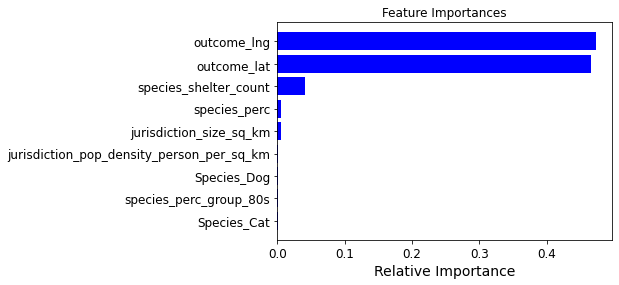

In [106]:
features = train_df.columns
importances = rand.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [105]:
dict(reversed(sorted(zip(rand.feature_importances_, train_df.columns.values))))

{0.0: 'species_perc_group_20s',
 4.7368195217552416e-11: 'shelter_id_Oakland',
 2.2033082392131433e-07: 'shelter_id_Las Vegas',
 3.76179449986896e-07: 'jurisdiction_region_Hidalgo County',
 6.795098135707737e-07: 'justidiction_state_CA',
 8.544969299948564e-07: 'jurisdiction_region_Dekalb County',
 1.4390974165531848e-06: 'jurisdiction_region_Alameda County',
 1.4854475383706896e-06: 'jurisdiction_region_Madera County',
 2.18245543157202e-06: 'Species_Other',
 2.995060806688733e-06: 'justidiction_state_GA',
 3.7382436057328137e-06: 'justidiction_state_FL',
 3.956543102834649e-06: 'shelter_id_Madera',
 4.608244477407878e-06: 'jurisdiction_region_Clark County',
 6.942851469442921e-06: 'justidiction_state_NY',
 7.434343809490015e-06: 'jurisdiction_region_Monroe County',
 8.375635584009761e-06: 'shelter_id_Pasco',
 8.959862891905856e-06: 'shelter_id_Rochester',
 9.024344681558784e-06: 'Species_Pet reptile',
 9.474823905884506e-06: 'Species_Pig',
 1.1626866205453795e-05: 'justidiction_state

### Model Training

In [107]:
x_train, x_test, y_train, y_test = train_test_split(train_df, dependent_variable, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [109]:
print(x_train.shape)
print(y_train.shape)

(10365, 50)
(10365,)


In [110]:
print(x_test.shape)
print(y_test.shape)

(4443, 50)
(4443,)


In [117]:
y_train.min()

0.0

In [130]:
#Linear Regression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 745579828.7694265
Mean Squared Error: 1.2349080376018063e+21
Root Mean Squared Error: 35141258338.337944
R-squared Error: -9.763118224602661e+20


In [133]:
#Random Forest Classifier

RandomForest = RandomForestRegressor(n_estimators=10)
RandomForest.fit(x_train, y_train)
y_pred_rand=RandomForest.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rand))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rand))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred_rand))

Mean Absolute Error: 0.8036579819587366
Mean Squared Error: 1.4055115047965876
Root Mean Squared Error: 1.1855427047544882
R-squared Error: -0.11119002950347334


In [132]:
#Support Vector Regressor

svr = SVR(kernel='rbf', gamma='scale')
svr.fit(x_train,y_train)
y_pred_svr=svr.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred_svr))

Mean Absolute Error: 0.6633884424917621
Mean Squared Error: 1.4587080022710193
Root Mean Squared Error: 1.2077698465647415
R-squared Error: -0.15324690160759014


### Model improvement

In [120]:
new_train_df = train_df[['Species_Cat','species_perc_group_80s','Species_Dog','jurisdiction_pop_density_person_per_sq_km',
      'jurisdiction_size_sq_km','species_perc','species_shelter_count','outcome_lat',
      'outcome_lng']]

x_trainCheck, x_testCheck, y_trainCheck, y_testCheck = train_test_split(new_train_df, dependent_variable, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [122]:
x_trainCheck

,Species_Cat,species_perc_group_80s,Species_Dog,jurisdiction_pop_density_person_per_sq_km,jurisdiction_size_sq_km,species_perc,species_shelter_count,outcome_lat,outcome_lng
1193,0,0,1,0.619745,-0.814250,0.030645,0.940799,-0.017408,-0.055624
45,0,0,1,-0.891548,1.219211,0.030645,-0.381652,-0.031888,0.082032
7559,0,1,1,-0.475891,-0.617683,-0.152758,-0.708316,-0.209831,-0.043295
976,0,0,1,-0.891548,1.219211,0.030645,-0.221988,-0.029176,0.082384
2963,0,0,1,-0.841252,0.451686,-0.010308,-0.914808,0.104289,0.167514
...,...,...,...,...,...,...,...,...,...
5191,0,0,1,1.693429,-0.934540,-0.044564,-0.791251,0.013672,-0.179358
13418,0,0,1,-0.891548,1.219211,0.030645,-0.386730,-0.035226,0.081893
5390,0,0,1,-0.891548,1.219211,0.030645,-0.221988,-0.029931,0.081467
860,0,0,1,-0.891548,1.219211,0.030645,-0.221988,-0.029950,0.082067


In [124]:
regressor = LinearRegression()
regressor.fit(x_trainCheck, y_trainCheck)
y_pred=regressor.predict(x_testCheck)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testCheck, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_testCheck, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testCheck, y_pred)))
print('R-squared Error:', metrics.r2_score(y_testCheck, y_pred))

Mean Absolute Error: 0.8024972364987835
Mean Squared Error: 1.249238858298557
Root Mean Squared Error: 1.1176935439996767
R-squared Error: 0.012358305803724212


In [128]:
#Random Forest Classifier

RandomForest = RandomForestRegressor(n_estimators=10)
RandomForest.fit(x_trainCheck, y_trainCheck)
y_pred_rand=RandomForest.predict(x_testCheck)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testCheck, y_pred_rand))
print('Mean Squared Error:', metrics.mean_squared_error(y_testCheck, y_pred_rand))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testCheck, y_pred_rand)))
print('R-squared Error:', metrics.r2_score(y_testCheck, y_pred_rand))

Mean Absolute Error: 0.8052072479741949
Mean Squared Error: 1.3985326790037844
Root Mean Squared Error: 1.1825957377750795
R-squared Error: -0.10567260640722687


In [134]:
#Support Vector Regressor

svr = SVR(kernel='rbf', gamma='scale')
svr.fit(x_trainCheck,y_trainCheck)
y_pred_svr=svr.predict(x_testCheck)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testCheck, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_testCheck, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testCheck, y_pred_svr)))
print('R-squared Error:', metrics.r2_score(y_testCheck, y_pred_svr))

Mean Absolute Error: 0.6633552716967558
Mean Squared Error: 1.4578967343508813
Root Mean Squared Error: 1.207433946164709
R-squared Error: -0.15260551744172846


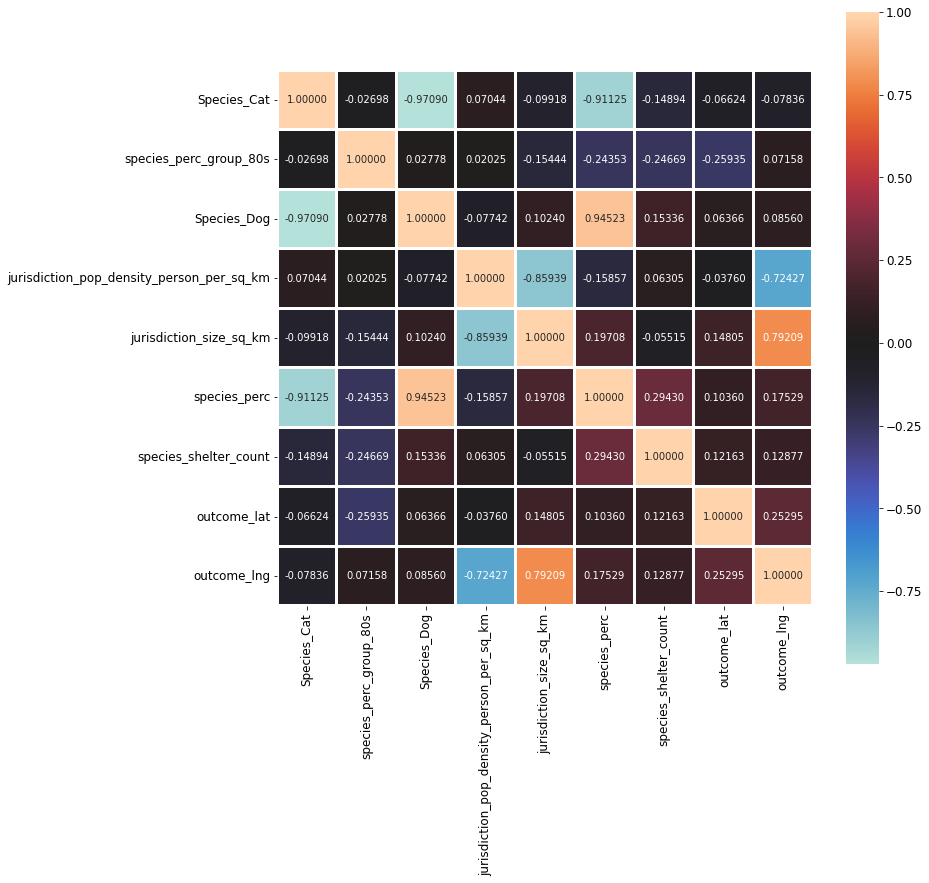

In [136]:
#Ploting the graph for better visualization
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(new_train_df.corr(), vmax=1.0, center=0, fmt='.5f', square=True, linewidths=2, annot=True)